# Python and R

In [8]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [10]:
%%R

# My commonly used R imports

require('tidyverse')



# Read the data



The cell below loads the data in python and filters down to presidential general election polls only:

In [11]:

df = pd.read_csv('raw-polls.csv')\
    .query("type_simple=='Pres-G'")

The cell below loads the same data in R and applies the same filter:

In [12]:
%%R

df <- read_csv('raw-polls.csv') %>% # read CSV
    filter(type_simple=='Pres-G') # filter to presidential general only

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 2,940 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1    6478      7947      40  2000 2000… US      Pres-G  Pres-G  Zogby …     395
 2    6483      7952     815  2000 2000… FL      Pres-G  Pres-G  McLaug…     203
 3    6470      7939     820  2000 2000… IL      Pres-G  Pres-G  KRC Re…     160
 4    6473      7942     820  2000 2000… IL      Pres-G  Pres-G  Resear…     281
 5    6474      7943     836  2000 2000… NH      Pres-G 

# Example Charts

Here are some very basic charts to get you started at looking at how far off these polls have been relative to the actual results of elections (`bias` variable). You will probably need to modify them significantly to get anything meaningful out of your exploratory dataviz. Think about which variables you might need to facet on the histogram (or what you might want to set the y axis to on the dotplot). 

note: This section is just example charts. You don't have to do anything here, just leave these charts as a starting point for you to copy/paste later. Scroll to the next section to get down to work!


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


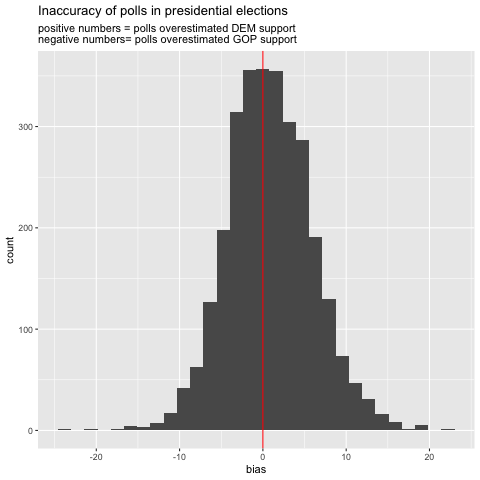

In [13]:
%%R 

ggplot(df) +
    geom_histogram(aes(x=bias)) +
    geom_vline(aes(xintercept=0), color='red') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )


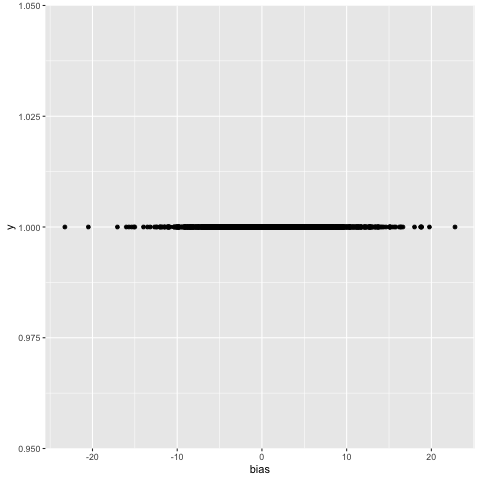

In [14]:
%%R 

ggplot(df) +
    aes(x=bias, y=1) + 
    geom_point() 

# Exploratory Data Visualization

In this section you'll make a few charts to explore the data. For each chart, write a short explanation of what you think you can and cannot conclude from the chart.

### Exploratory chart 1

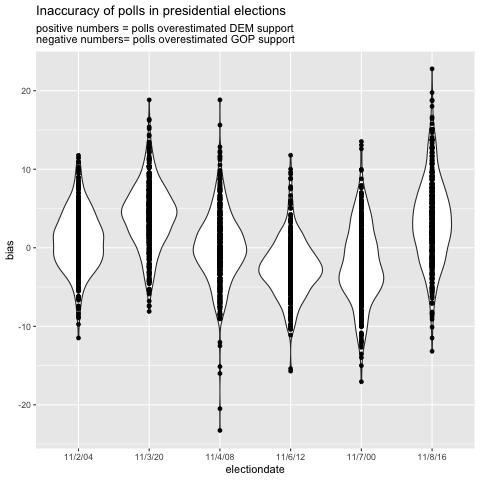

In [63]:
%%R

# 👉Chart 1
# Insert code for a ggplot chart below
#Dot Jitter Plot

ggplot(df, aes(x=electiondate, y=bias)) +
    geom_violin()+ geom_point()+
    geom_vline(aes(xintercept=0), color='red')+
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )


👉 Summary

_This is a combined dot and violin plot exploring how bias has shifted over time. I began with a dot plot but sometimes dot plots obscure the distribution when opacity is not easily eyeballed. Then I tried a dot jitter plot which was helpful but disorganised. I decided on a combined violin dot plot. Through it, I was able to see the distribution of the dots through the dot opacity as well as the width of the violin._

👉 Reflection

What I can conclude based on this chart:
* There was a lower bias among pollsters in the 2020 elections than in 2016 elections, with less significant outliers. 
* The 2008 election saw significant outliers in terms of bias towards the Republican side.
* The 2004 election was roughly evenly distributed, with most pollsters polling close to correctly

What I can't conclude based on this chart:
* What made some pollsters get it nearly correct?
* What was the cause of inaccuracies?
* What are the voting trends by demographic?



### Exploratory chart 2

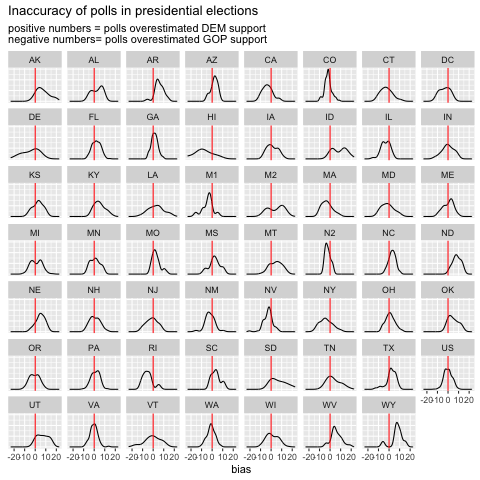

In [49]:
%%R

# 👉Chart 2
# Insert code for a ggplot chart below
#Density plot


ggplot(df) +
    aes(x=bias) +
    geom_density() + 
    geom_vline(aes(xintercept=0), color='red')+
    facet_wrap(vars(location)) +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support")+
      theme(axis.title.y=element_blank(),
            axis.text.y=element_blank(),  #remove y axis labels
            axis.ticks.y=element_blank()  #remove y axis ticks
            )




👉 Summary

_This is a density plot showing bias by locations_

👉 Reflection

What I can conclude based on this chart:
* National pollsters covering the US often polled close to correctly
* Pollsters in VA, WA, and NJ also often polled close to correctly
* Some states were polled by more pollsters

What I can't conclude based on this chart:
* Are there states that are polled more or is it a factor of each state's population? 
* How does this differ on eg race, age, gender?
* What factors cause irregular distributions eg in ID, MO, RI and SC



### Exploratory chart 3

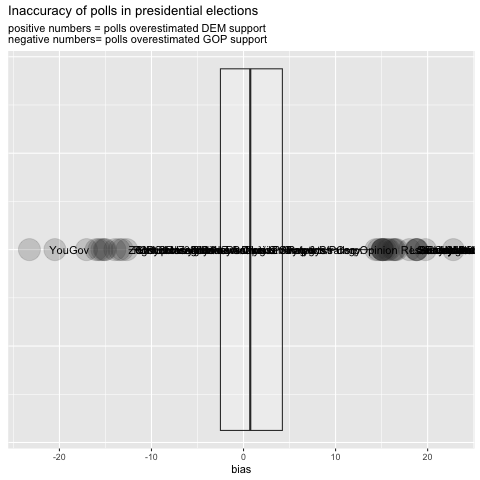

In [67]:
%%R

# 👉 Chart 2
# Insert code for a ggplot chart below


#Define function to find the outlier

find_outlier <- function(x) {
  return(x < quantile(x, .25) - 1.5*IQR(x) | x > quantile(x, .75) + 1.5*IQR(x))
}
# modify this code

#call necessary libraries?
library(ggplot2)
library(dplyr)

#add new column to data frame that indicates if each observation is an outlier
df <- df %>%
        mutate(outlier = ifelse(find_outlier(bias), pollster, NA))


ggplot(df) + 
    aes(x=bias, y=1) +
    geom_boxplot(alpha=.2,outlier.size=10) +
     geom_text(aes(label=outlier), na.rm=TRUE, hjust=-.5)+
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support")+
      theme(axis.title.y=element_blank(),
            axis.text.y=element_blank(),  #remove y axis labels
            axis.ticks.y=element_blank()  #remove y axis ticks
            )


👉 Summary

_This is a box plot of the pollsters_

👉 Reflection

What I can conclude based on this chart:
* The box plot shows that the median of this chart is nearly 0, meaning that many pollsters were close to correct on polling. 
* Polling was generally biased towards overestimating Democratic support
* The 25th and 75th percentile was nearly equidistant from the median.

What I can't conclude based on this chart:
* I can't make a sweeping statement about whether polls were correct or not 
* I can't know how significant the bias of the outliers is 



# New Questions

Good exploratory viz generates some answers, but usually lots of new questions. 
What new questions do you have now that you've had a chance to do some exploration with the data?

👉Why does my beeswarm look like this? 
>How can I make it to a better scale?


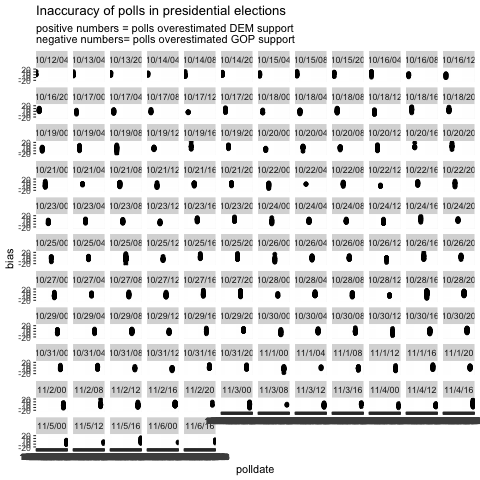

In [66]:
%%R 

set.seed(12345)
library(ggplot2)
library(ggbeeswarm)

ggplot(df) + 
    aes(polldate, y=bias) +
    facet_wrap(vars(polldate)) +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )+
    geom_quasirandom()